In [1]:
import numpy as np
import torch
import torch.nn as nn
from sklearn.datasets import load_linnerud
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
# Load the Dataset:
data = load_linnerud()
data.feature_names, data.target_names

(['Chins', 'Situps', 'Jumps'], ['Weight', 'Waist', 'Pulse'])

In [3]:
X = data.data

In [4]:
y = data.target[:, 0]  # Only using weight as target 

In [5]:
# Preprocess the Dataset:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# y is not scaled 
# Why ? in regression we need to calculate loss(MSE) and we will need real values 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,test_size=0.2, random_state=42)

In [6]:
# Implement Neural Network:

class Regression(nn.Module):
    def __init__(self, input_size):
        super(Regression, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

        
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

input_size = X_train.shape[1] # 3 inputs
model = Regression(input_size)


In [7]:
# Define Loss Function and Optimizer:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# Training Loop:
num_epochs = 4000
train_losses = []
test_losses = []
epoch_count=[]

for epoch in range(num_epochs):
    inputs = torch.tensor(X_train, dtype=torch.float32)
    targets = torch.tensor(y_train, dtype=torch.float32)
    
    optimizer.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets.unsqueeze(1))
    loss.backward()
    optimizer.step()
    
    with torch.inference_mode():
        test_inputs = torch.tensor(X_test, dtype=torch.float32)
        test_outputs = model(test_inputs)
        test_loss = criterion(test_outputs, torch.tensor(y_test, dtype=torch.float32).unsqueeze(1))

    train_losses.append(loss.item())  
    test_losses.append(test_loss.item())
    epoch_count.append(epoch)


    if (epoch + 1) % 500 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [500/4000], Loss: 1098.7137
Epoch [1000/4000], Loss: 428.2184
Epoch [1500/4000], Loss: 255.9829
Epoch [2000/4000], Loss: 158.3126
Epoch [2500/4000], Loss: 72.9874
Epoch [3000/4000], Loss: 28.4764
Epoch [3500/4000], Loss: 17.3458
Epoch [4000/4000], Loss: 11.5369


In [9]:
# Evaluate the Model:
with torch.no_grad():
    test_inputs = torch.tensor(X_test, dtype=torch.float32)
    predicted = model(test_inputs).squeeze().numpy()
    mse = np.mean((predicted - y_test) ** 2)
    print(f'Mean Squared Error on Test Data: {mse:.4f}')


Mean Squared Error on Test Data: 344.7350


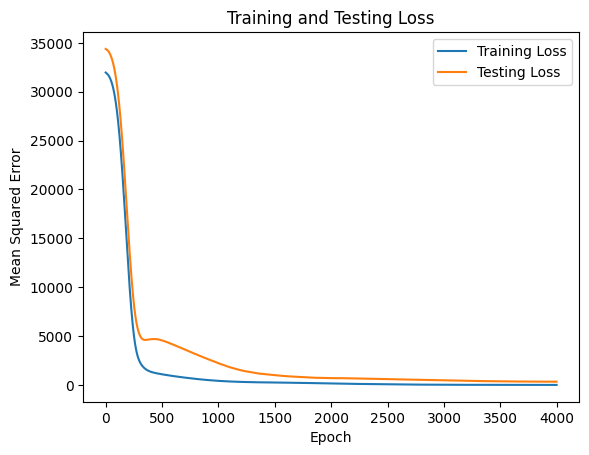

In [10]:
# Plot Training Loss & Testing Loss:

plt.plot(epoch_count, np.array(torch.tensor(train_losses).numpy()), label='Training Loss')
plt.plot(epoch_count, np.array(torch.tensor(test_losses).numpy()), label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()